In [2]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def kinetic(x, y, z):
    r2 = x*x+y*y+z*z
    a = 1.0
    b = 1.0
    return np.exp(-(a+b)*r2)*(4*b*b*r2-6)*(-0.5)

In [10]:
integrate.nquad(kinetic, ([-np.inf, +np.inf],)*3)

(2.953051864823921, 3.7879371924592486e-08)

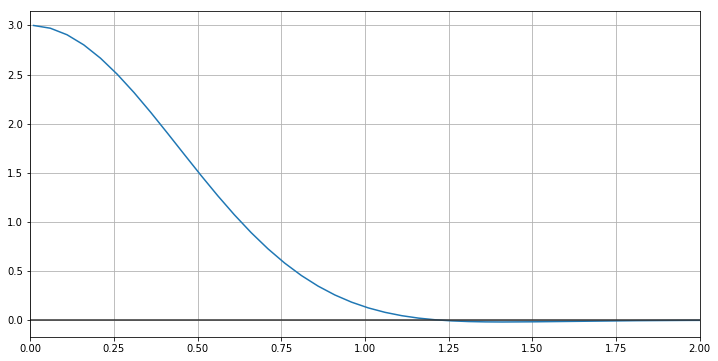

In [11]:
a = np.loadtxt('./kin_r_y1_y2')
r = a[:,0]
y1 = a[:,1]
y2 = a[:,2]

plt.figure(figsize=(12, 6))
plt.plot(r, kinetic(r, 0, 0))

plt.grid()
plt.xlim(0, 2)
plt.legend()
plt.axhline(0, color='#333333')

In [12]:
np.sum(kinetic(r, 0, 0))*(r[1]-r[0])

1.6116586864666613

In [13]:
a = 1.0
b = 1.0
3.0*b*np.power(np.pi/(a+b), 1.5) - 3.0*b**2*np.sqrt(np.pi**3/(a+b)**5)

2.9530518648229536

In [4]:
def gaussian(x, y, z):
    radius = np.linalg.norm((x,y,z))
    return np.exp(-radius*radius)

In [5]:
%time
integrate.nquad(gaussian2, ([-np.inf, +np.inf],)*3)

(0.4392766236829998, 1.4897881241611791e-08)

In [15]:
def gaussian2(x, y, z):
    radius1 = np.linalg.norm((x,y,z))
    radius2 = np.linalg.norm((x-1,y-1,z-1))
    return np.exp(-radius1**2)*np.exp(-radius2**2)

# Two center integral
def gaussian3(x, y, z):
    radius1 = np.linalg.norm((x,y,z))
    radius2 = np.linalg.norm((x-1,y-1,z-1))
    return np.exp(-radius1**2)*np.exp(-0.5*radius2**2)

# Three center integral
def gaussian4(x, y, z):
    radius1 = np.linalg.norm((x,y,z))
    radius2 = np.linalg.norm((x-1,y-1,z-1))
    radius3 = np.linalg.norm((x,y-2,z))
    return np.exp(-radius1**2)*np.exp(-0.5*radius2**2)*np.exp(-0.5*radius3**2)

In [10]:
%time integrate.nquad(gaussian3, ([-np.inf, +np.inf],)*3,\
                      opts={'epsabs': 0.0001})
# 1.115?

CPU times: user 24.7 s, sys: 108 ms, total: 24.8 s
Wall time: 24.9 s


(1.1150476593775354, 9.949291755814715e-05)

In [20]:
%time integrate.nquad(gaussian4, ([-np.inf, +np.inf],)*3)
# 0.23500255662545222

CPU times: user 1min 39s, sys: 617 ms, total: 1min 39s
Wall time: 1min 41s


(0.23512783310361243, 1.4891088215805703e-08)

In [10]:
0.23529925750848760/0.03822915106223546

6.154969466243973

In [13]:
5.568327996830833/0.44311346272644436

12.566370614355344

In [14]:
12.566370614355344/np.pi

3.9999999999987814

In [25]:
integrate.quad(gauss_1d, 0, +np.inf)

(0.8862269254527579, 7.101318390472462e-09)

In [26]:
def gauss_1d(x):
    return np.exp(-x**2)

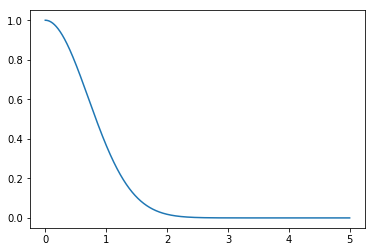

In [33]:
x_axis = np.linspace(0, 5, 10000)
plt.plot(x_axis, gauss_1d(x_axis))

In [34]:
np.sum(gauss_1d(x_axis))*(x_axis[1]-x_axis[0])

0.88647695045389929